<a href="https://colab.research.google.com/github/JinHuiXu1991/DataScienceProjects/blob/main/University_System_of_Maryland_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data_2019 = pd.read_csv('cy2019-md.csv', low_memory=False)
data_2018 = pd.read_csv('cy2018-md.csv', low_memory=False)
data_2017 = pd.read_csv('cy2017-md.csv', low_memory=False)
data_2016 = pd.read_csv('cy2016-md.csv', low_memory=False)
data_2015 = pd.read_csv('cy2015-md.csv', low_memory=False)
data_2014 = pd.read_csv('cy2014-md.csv', low_memory=False)
data_2013 = pd.read_csv('cy2013-md.csv', low_memory=False)
data_2012 = pd.read_csv('cy2012-md.csv', low_memory=False)

df_2019 = pd.DataFrame(data_2019)
df_2018 = pd.DataFrame(data_2018)
df_2017 = pd.DataFrame(data_2017)
df_2016 = pd.DataFrame(data_2016)
df_2015 = pd.DataFrame(data_2015)
df_2014 = pd.DataFrame(data_2014)
df_2013 = pd.DataFrame(data_2013)
df_2012 = pd.DataFrame(data_2012)



In [ ]:
df_2019['year'] = "2019"
df_2018['year'] = "2018"
df_2017['year'] = "2017"
df_2016['year'] = "2016"
df_2015['year'] = "2015"
df_2014['year'] = "2014"
df_2013['year'] = "2013"
df_2012['year'] = "2012"

frames = [df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012]
df = pd.concat(frames, sort=False)
df

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,...,overtime_earnings,other_earnings,ytd_gross_earnings,term_date,year,suffix,hire_date,id,msa_code,sheet
0,JOHN,C,POLIKS,NaN,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,8096.0,71000.0,...,14000.0,500.0,85000.0,NaN,2019,NaN,NaN,NaN,NaN,NaN
1,CARL,NaN,CHAMBERLIN,NaN,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,515.0,96000.0,...,0.0,500.0,94000.0,NaN,2019,NaN,NaN,NaN,NaN,NaN
2,JOSEPHINE,K,OBONYO,NaN,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,4849.0,73000.0,...,0.0,2800.0,71000.0,NaN,2019,NaN,NaN,NaN,NaN,NaN
3,LORI,J,MCFARLIN,NaN,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,7480.0,73000.0,...,1000.0,2200.0,74000.0,NaN,2019,NaN,NaN,NaN,NaN,NaN
4,ELWOOD,D,HALL,JR,RG,290201.0,DEPARTMENT OF TRANSPORTATION,290201,7896.0,52000.0,...,18000.0,1800.0,70000.0,NaN,2019,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135722,PAUL,NaN,WARD,,UM,360236.0,UNIVERSITY OF MARYLAND,360236-USMO,1212.0,36000.0,...,0.0,36000.0,36000.0,NaN,2012,NaN,2002-01-28,NaN,NaN,2012
135723,GREGG,NaN,YELDELL,,UM,360236.0,UNIVERSITY OF MARYLAND,360236-USMO,1212.0,73000.0,...,0.0,73000.0,73000.0,NaN,2012,NaN,2009-09-21,NaN,NaN,2012
135724,ZAKIYA,NaN,SMITH LEE,,UM,360236.0,UNIVERSITY OF MARYLAND,360236-USMO,1212.0,63000.0,...,0.0,63000.0,63000.0,NaN,2012,NaN,2011-07-05,NaN,NaN,2012
135725,PAUL,NaN,STACKPOLE,,UM,360236.0,UNIVERSITY OF MARYLAND,360236-USMO,1212.0,94000.0,...,0.0,93000.0,93000.0,NaN,2012,NaN,2003-01-21,NaN,NaN,2012


In [ ]:
df.loc[(df['subtitle'].str.endswith('UMBC', na=False)), 'location'] = "Baltimore County"
df.loc[(df['subtitle'].str.endswith('UMCP', na=False)), 'location'] = "Prince Georges County"
df.loc[(df['subtitle'].str.endswith('UMB', na=False)), 'location'] = "Baltimore City"
df.loc[(df['subtitle'].str.endswith('UMES', na=False)), 'location'] = "Somerset County"
df.loc[(df['subtitle'].str.endswith(('UMGC','UMUC'), na=False)), 'location'] = "Prince Georges County"

df.loc[(df['subtitle'].str.endswith('UMBC', na=False)), 'School'] = "UMBC"
df.loc[(df['subtitle'].str.endswith('UMCP', na=False)), 'School'] = "UMCP"
df.loc[(df['subtitle'].str.endswith('UMB', na=False)), 'School'] = "UMB"
df.loc[(df['subtitle'].str.endswith('UMES', na=False)), 'School'] = "UMES"
df.loc[(df['subtitle'].str.endswith(('UMGC','UMUC'), na=False)), 'School'] = "UMGC"

cut_points = [-1,10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000,110000,120000,130000,140000,150000, 10000000]
label_names = ["0-10000","10001-20000","20001-30000","30001-40000","40001-50000",
              "50001-60000","60001-70000","70001-80000","80001-90000","90001-100000",
              "100001-110000","110001-120000","120001-130000","130001-140000","140001-150000", "150000+"]
df["income_categories"] = pd.cut(df["ytd_gross_earnings"],cut_points,labels=label_names)

UMBC = df[df['subtitle'].str.endswith('UMBC', na=False)]
UMCP = df[df['subtitle'].str.endswith('UMCP', na=False)]
UMB = df[df['subtitle'].str.endswith('UMB', na=False)]
UMGC = df[df['subtitle'].str.endswith(('UMGC','UMUC'), na=False)]
UMES = df[df['subtitle'].str.endswith('UMES', na=False)]

universities = UMBC.append(UMCP).append(UMB).append(UMGC).append(UMES)
display(universities)

print("UMBC records number: " + str(len(UMBC)))
print("UMCP records number: " + str(len(UMCP)))
print("UMB records number: " + str(len(UMB)))
print("UMGC records number: " + str(len(UMGC)))
print("UMES records number: " + str(len(UMES)))

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,...,term_date,year,suffix,hire_date,id,msa_code,sheet,location,School,income_categories
123086,OLEG,NaN,FIRSIN,NaN,UM,360231.0,UNIVERSITY OF MARYLAND,360231-UMBC,1012.0,100000.0,...,NaN,2019,NaN,NaN,NaN,NaN,NaN,Baltimore County,UMBC,100001-110000
123087,B,M,RABIN,NaN,UM,360231.0,UNIVERSITY OF MARYLAND,360231-UMBC,1212.0,141000.0,...,NaN,2019,NaN,NaN,NaN,NaN,NaN,Baltimore County,UMBC,130001-140000
123088,MD TOUHIDUL,NaN,ISLAM,NaN,UM,360231.0,UNIVERSITY OF MARYLAND,360231-UMBC,1212.0,32000.0,...,NaN,2019,NaN,NaN,NaN,NaN,NaN,Baltimore County,UMBC,0-10000
123089,RUCHITA,NaN,PARAB,NaN,UM,360231.0,UNIVERSITY OF MARYLAND,360231-UMBC,1111.0,0.0,...,2019-05-26T00:00:00Z,2019,NaN,NaN,NaN,NaN,NaN,Baltimore County,UMBC,0-10000
123090,SURBHI,G,LIPKIN-MOORE,NaN,UM,360231.0,UNIVERSITY OF MARYLAND,360231-UMBC,1212.0,18000.0,...,NaN,2019,NaN,NaN,NaN,NaN,NaN,Baltimore County,UMBC,0-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129291,SALAH,NaN,ELBASHIR,,UM,360225.0,UNIVERSITY OF MARYLAND,360225-UMES,1212.0,16000.0,...,NaN,2012,NaN,2011-09-16,NaN,NaN,2012,Somerset County,UMES,10001-20000
129292,MOSES,NaN,KAIRO,,UM,360225.0,UNIVERSITY OF MARYLAND,360225-UMES,1212.0,140000.0,...,NaN,2012,NaN,2012-08-13,NaN,NaN,2012,Somerset County,UMES,40001-50000
129293,VIRGINIE,NaN,ZOUMENOU,,UM,360225.0,UNIVERSITY OF MARYLAND,360225-UMES,1212.0,19000.0,...,NaN,2012,NaN,2012-07-01,NaN,NaN,2012,Somerset County,UMES,10001-20000
129294,MARC-ANTOINE,NaN,AGBOTON,,UM,360225.0,UNIVERSITY OF MARYLAND,360225-UMES,1111.0,0.0,...,NaN,2012,NaN,2007-07-08,NaN,NaN,2012,Somerset County,UMES,0-10000


UMBC records number: 45980
UMCP records number: 178616
UMB records number: 65329
UMGC records number: 27867
UMES records number: 12628


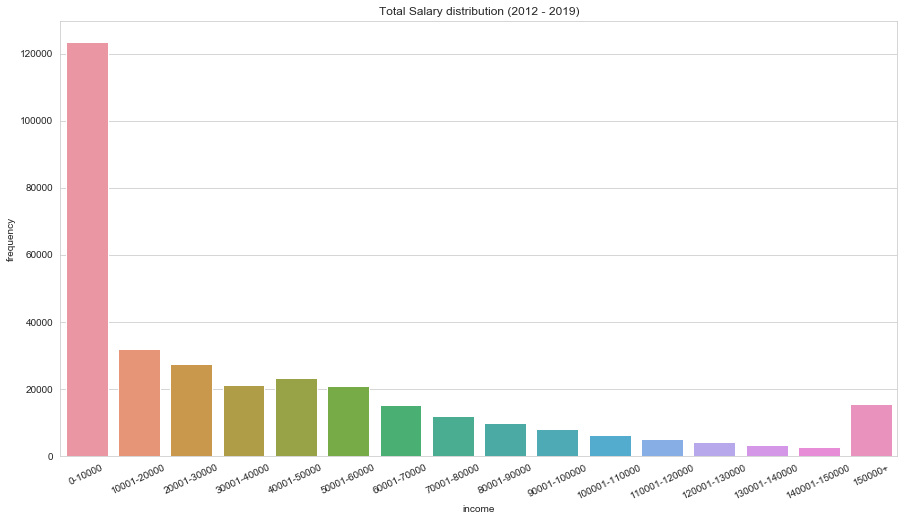

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,8))
plt.title('Total Salary distribution (2012 - 2019)')
ax = sns.countplot(x="income_categories", data=universities)
ax.set(xlabel='income', ylabel='frequency')
plt.xticks(rotation=25)
plt.show()

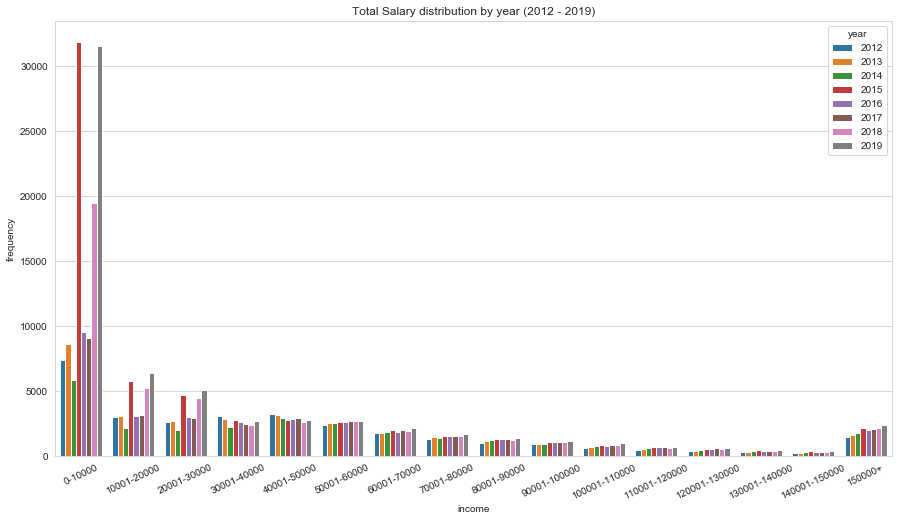

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Total Salary distribution by year (2012 - 2019)')
ax = sns.countplot(x="income_categories", hue="year", data=universities)
ax.set(xlabel='income', ylabel='frequency')
plt.xticks(rotation=25)
plt.show()

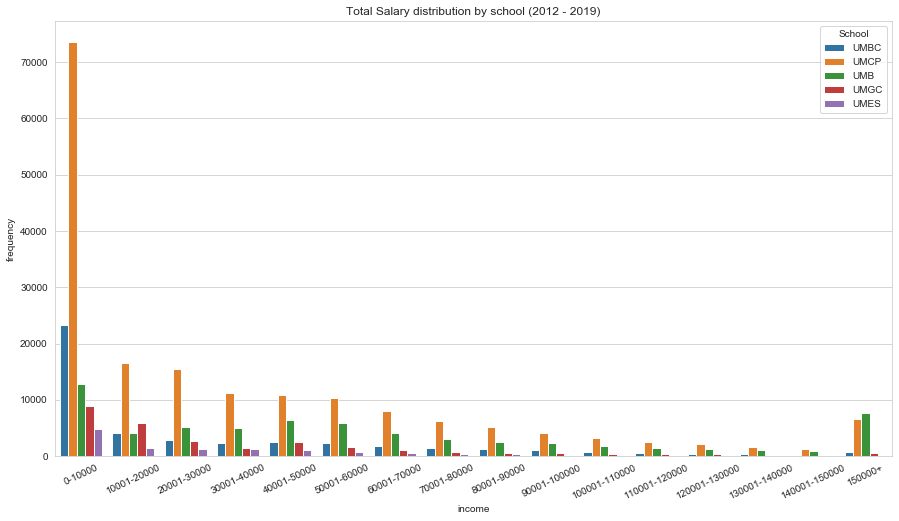

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Total Salary distribution by school (2012 - 2019)')
ax = sns.countplot(x="income_categories", hue="School", data=universities)
ax.set(xlabel='income', ylabel='frequency')
plt.xticks(rotation=25)
plt.show()

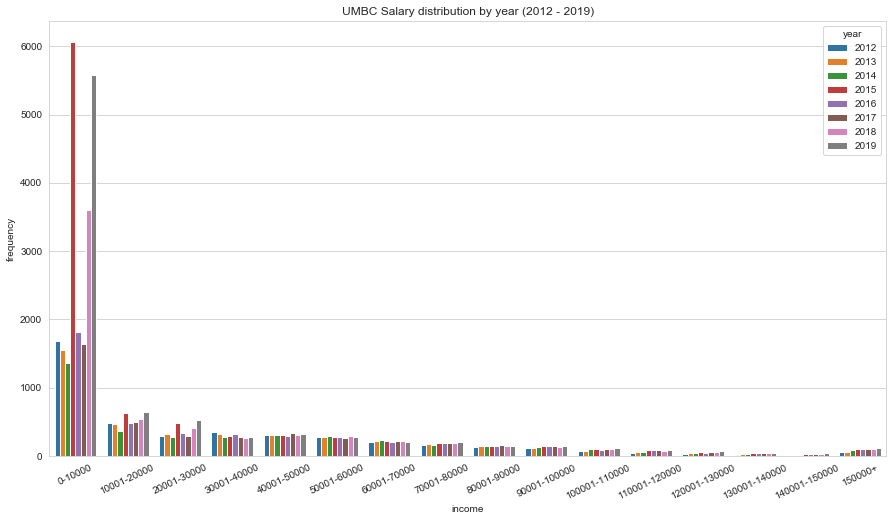

In [ ]:
plt.figure(figsize=(15,8))
plt.title('UMBC Salary distribution by year (2012 - 2019)')
ax = sns.countplot(x="income_categories", hue="year", data=UMBC)
ax.set(xlabel='income', ylabel='frequency')
plt.xticks(rotation=25)
plt.show()

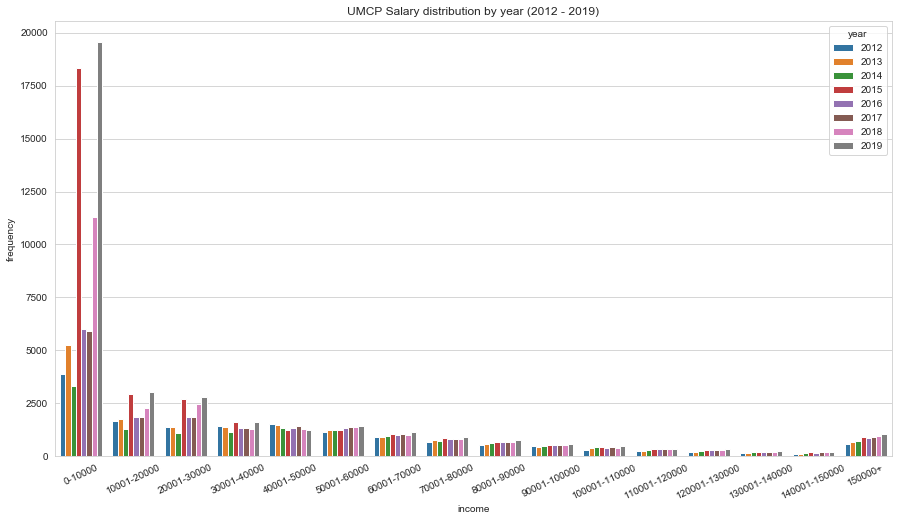

In [ ]:
plt.figure(figsize=(15,8))
plt.title('UMCP Salary distribution by year (2012 - 2019)')
ax = sns.countplot(x="income_categories", hue="year", data=UMCP)
ax.set(xlabel='income', ylabel='frequency')
plt.xticks(rotation=25)
plt.show()

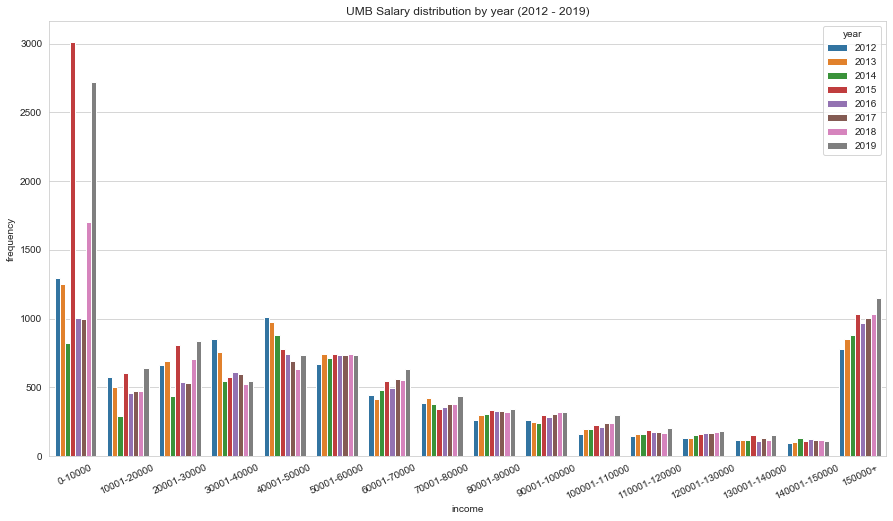

In [ ]:
plt.figure(figsize=(15,8))
plt.title('UMB Salary distribution by year (2012 - 2019)')
ax = sns.countplot(x="income_categories", hue="year", data=UMB)
ax.set(xlabel='income', ylabel='frequency')
plt.xticks(rotation=25)
plt.show()

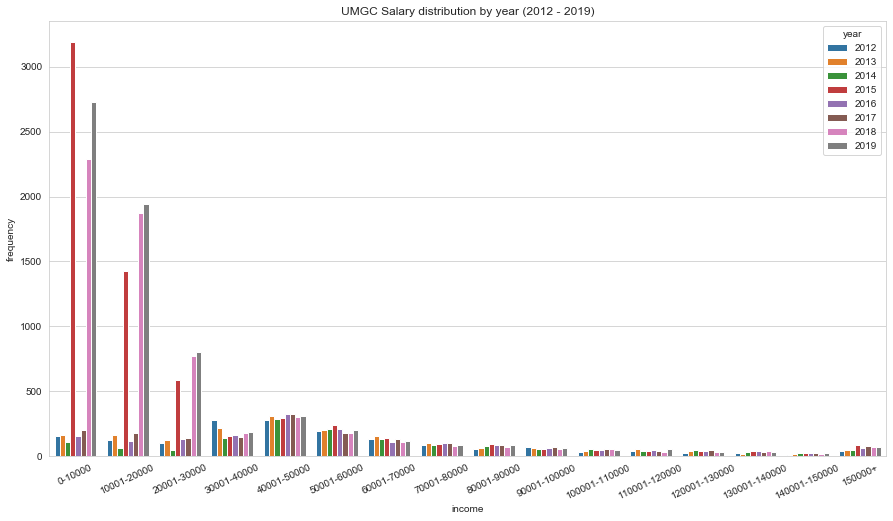

In [ ]:
plt.figure(figsize=(15,8))
plt.title('UMGC Salary distribution by year (2012 - 2019)')
ax = sns.countplot(x="income_categories", hue="year", data=UMGC)
ax.set(xlabel='income', ylabel='frequency')
plt.xticks(rotation=25)
plt.show()

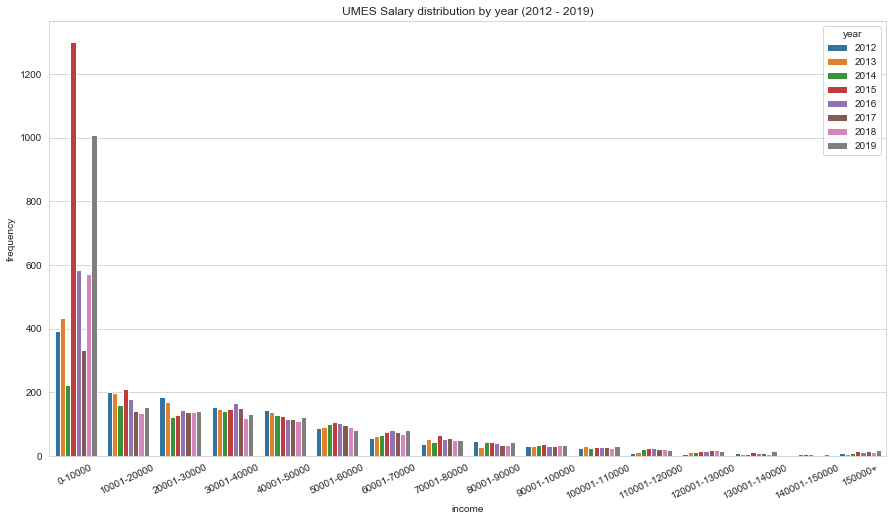

In [ ]:
plt.figure(figsize=(15,8))
plt.title('UMES Salary distribution by year (2012 - 2019)')
ax = sns.countplot(x="income_categories", hue="year", data=UMES)
ax.set(xlabel='income', ylabel='frequency')
plt.xticks(rotation=25)
plt.show()

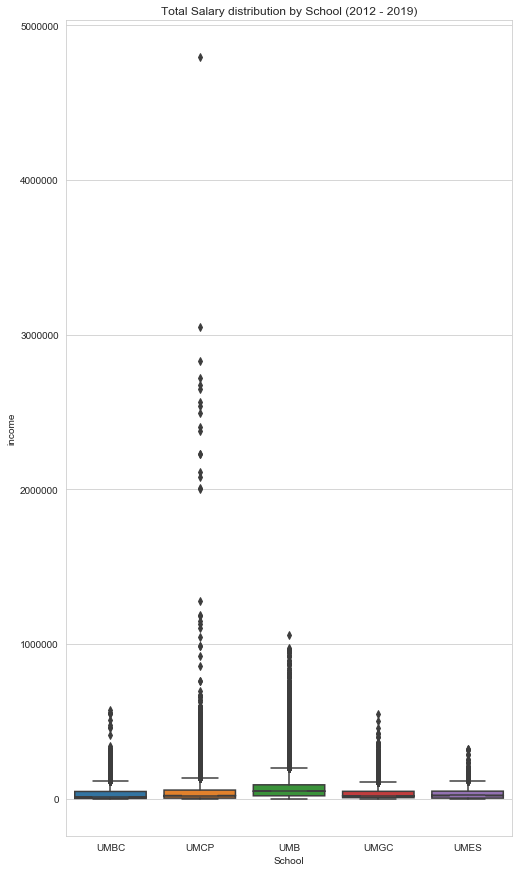

In [ ]:
plt.figure(figsize=(8,15))
plt.title('Total Salary distribution by School (2012 - 2019)')
ax = sns.boxplot(x="School", y="ytd_gross_earnings", data=universities, notch=True)
ax.set(xlabel='School', ylabel='income')
plt.show()

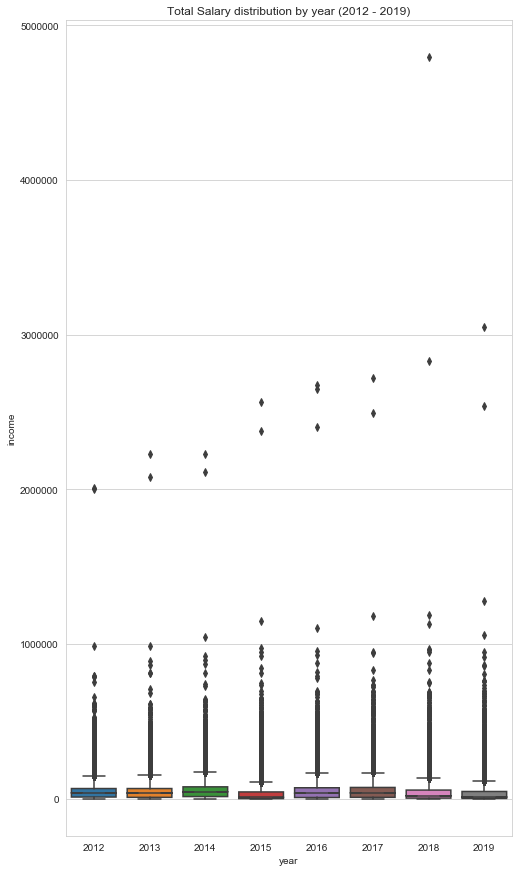

In [ ]:
plt.figure(figsize=(8,15))
plt.title('Total Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=universities, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

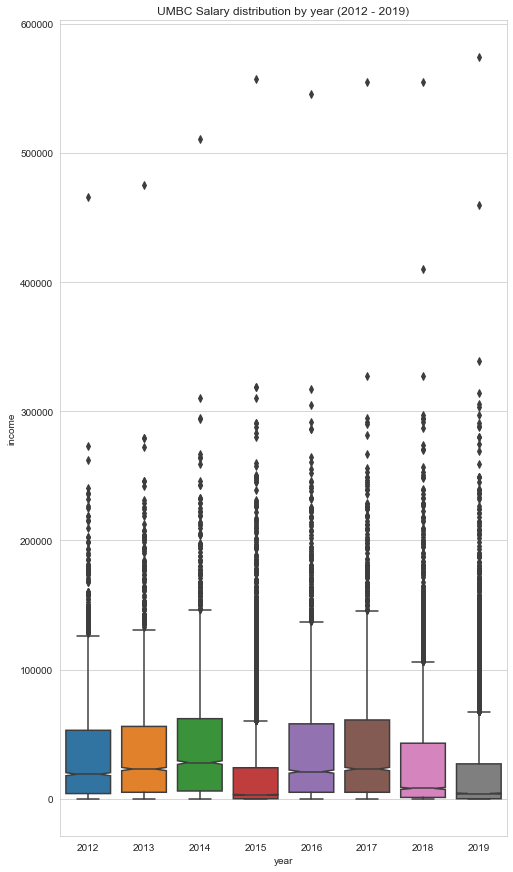

In [ ]:
plt.figure(figsize=(8,15))
plt.title('UMBC Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMBC, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

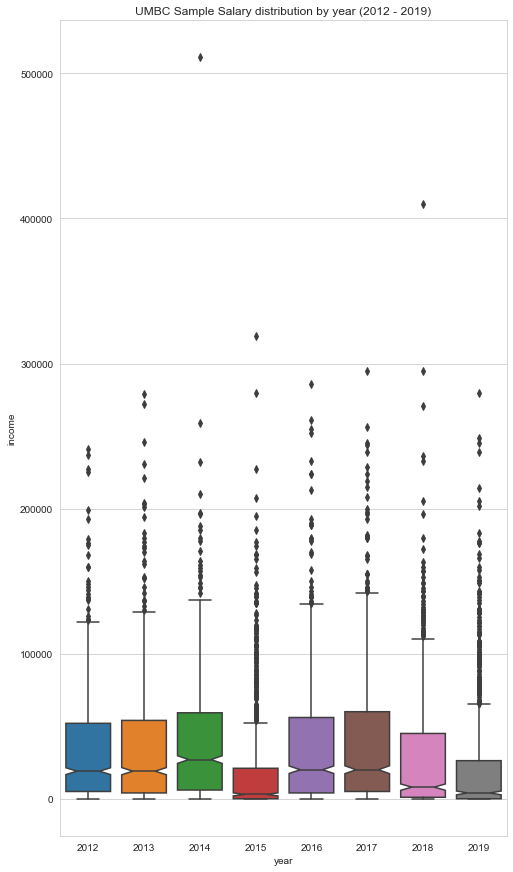

In [ ]:
fn = lambda obj: obj.loc[np.random.choice(obj.index, 1000, False),:]
UMBC_sample_salary = UMBC.groupby('year').apply(fn)

plt.figure(figsize=(8,15))
plt.title('UMBC Sample Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMBC_sample_salary, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

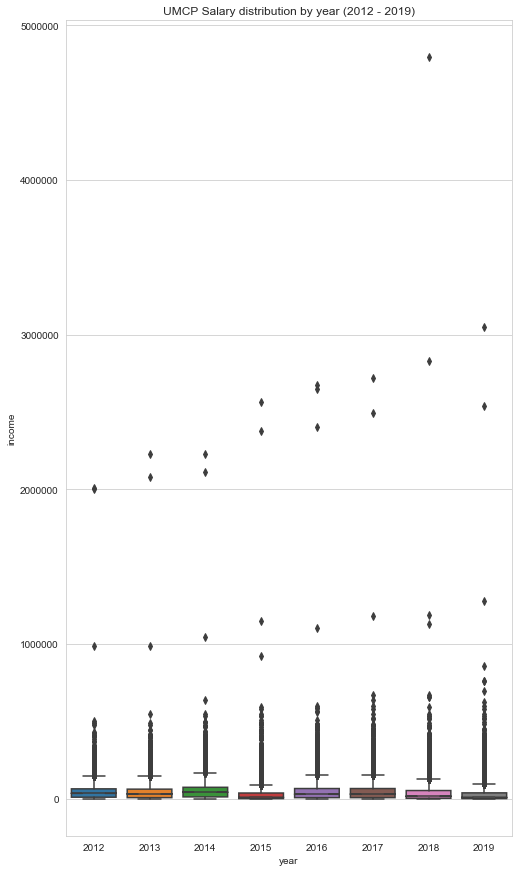

In [ ]:
plt.figure(figsize=(8,15))
plt.title('UMCP Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMCP, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

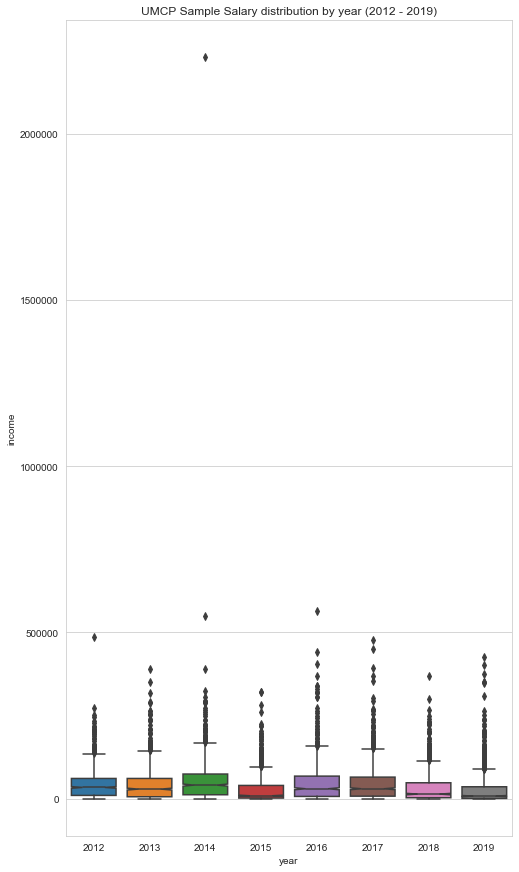

In [ ]:
fn = lambda obj: obj.loc[np.random.choice(obj.index, 1000, False),:]
UMCP_sample_salary = UMCP.groupby('year').apply(fn)

plt.figure(figsize=(8,15))
plt.title('UMCP Sample Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMCP_sample_salary, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

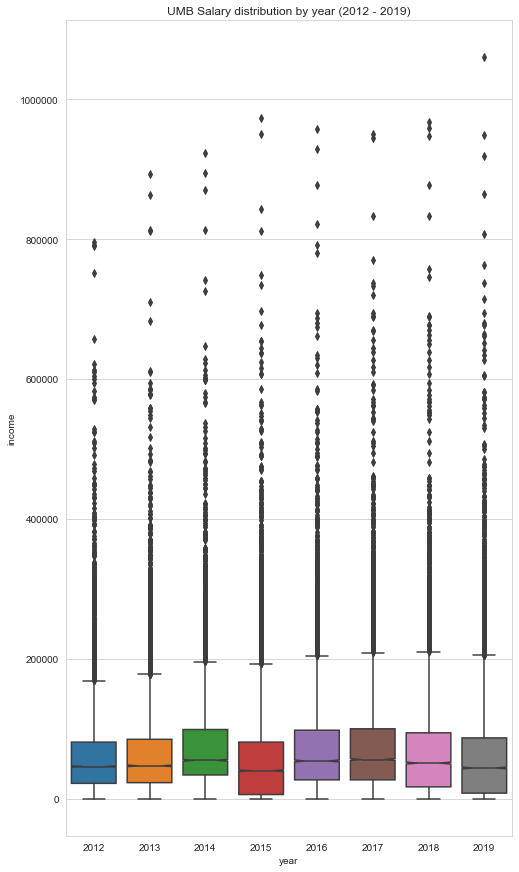

In [ ]:
plt.figure(figsize=(8,15))
plt.title('UMB Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMB, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

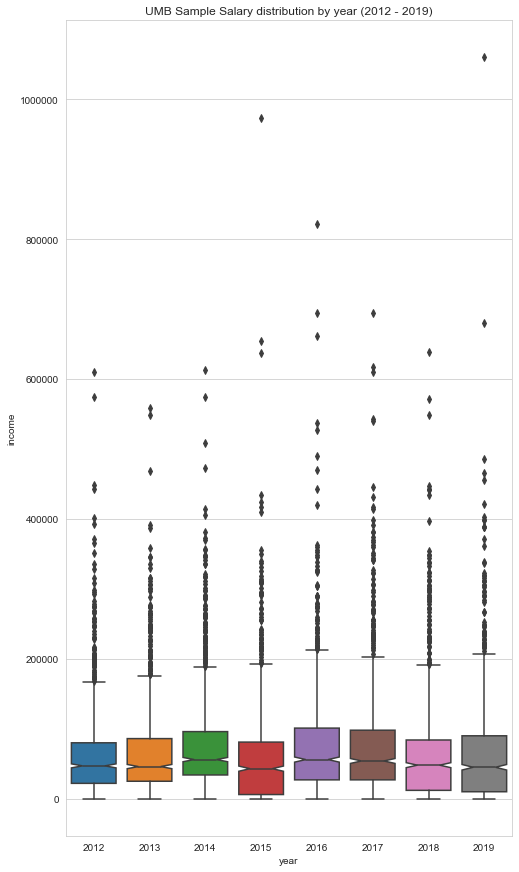

In [ ]:
fn = lambda obj: obj.loc[np.random.choice(obj.index, 1000, False),:]
UMB_sample_salary = UMB.groupby('year').apply(fn)

plt.figure(figsize=(8,15))
plt.title('UMB Sample Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMB_sample_salary, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

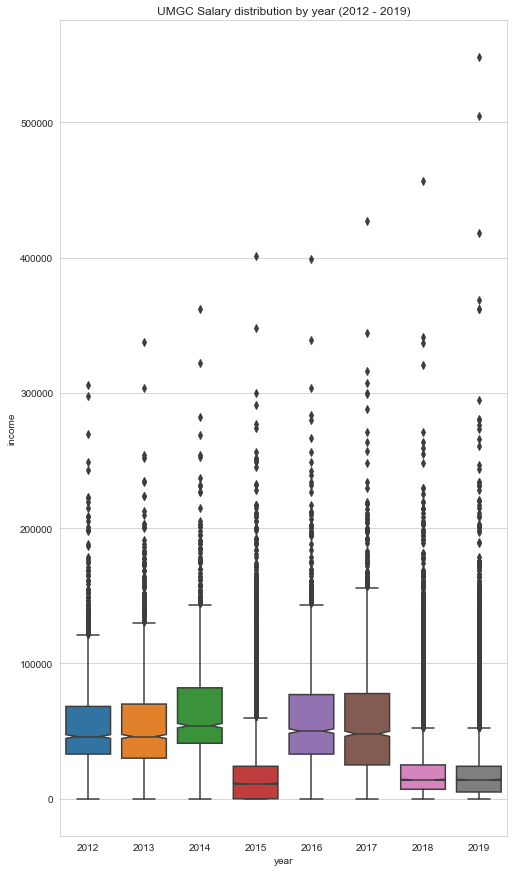

In [ ]:
plt.figure(figsize=(8,15))
plt.title('UMGC Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMGC, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

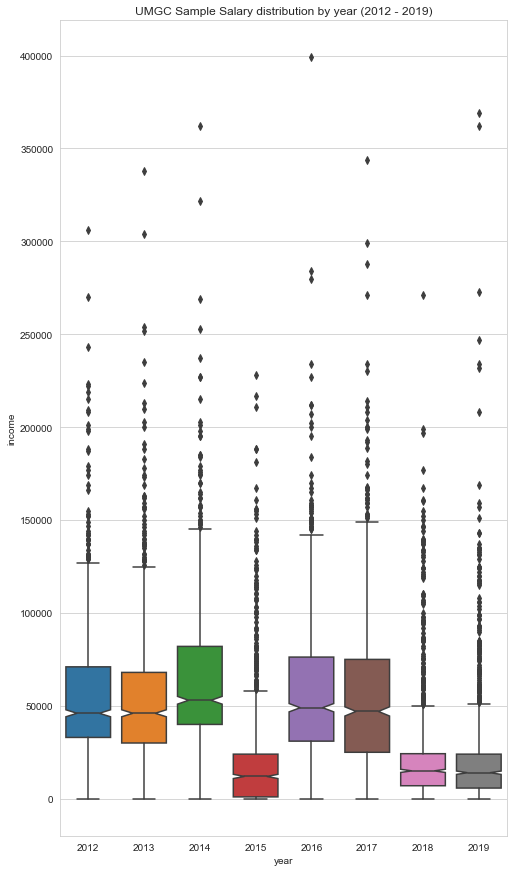

In [ ]:
fn = lambda obj: obj.loc[np.random.choice(obj.index, 1000, False),:]
UMGC_sample_salary = UMGC.groupby('year').apply(fn)

plt.figure(figsize=(8,15))
plt.title('UMGC Sample Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMGC_sample_salary, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

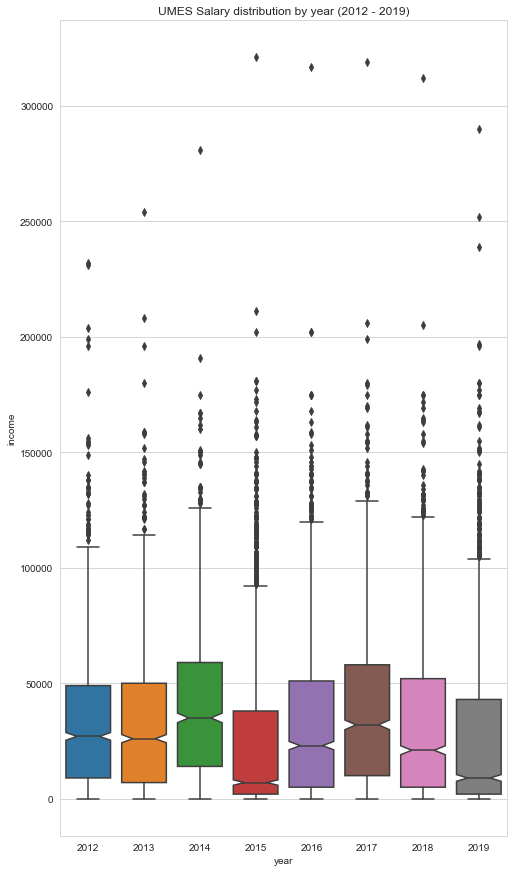

In [ ]:
plt.figure(figsize=(8,15))
plt.title('UMES Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMES, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

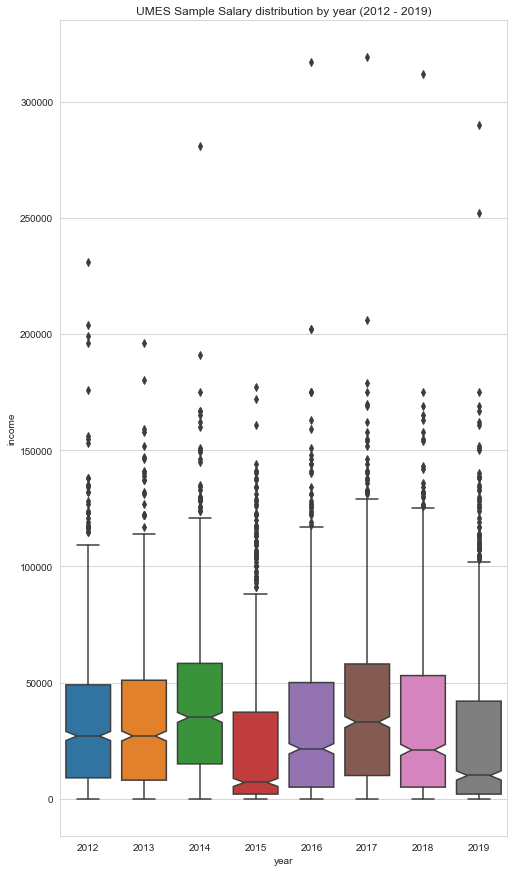

In [ ]:
fn = lambda obj: obj.loc[np.random.choice(obj.index, 1000, False),:]
UMES_sample_salary = UMES.groupby('year').apply(fn)

plt.figure(figsize=(8,15))
plt.title('UMES Sample Salary distribution by year (2012 - 2019)')
ax = sns.boxplot(x="year", y="ytd_gross_earnings", data=UMES_sample_salary, notch=True)
ax.set(xlabel='year', ylabel='income')
plt.show()

# Analysis of Variance Test (ANOVA) 
### H0: salaries are all equal among the universities.
### Ha: at least one of the universities is different from others.

In [ ]:
UMBC_sample_salary_total = UMBC.sample(n = 1000, replace = False) 
UMCP_sample_salary_total = UMCP.sample(n = 1000, replace = False) 
UMB_sample_salary_total = UMB.sample(n = 1000, replace = False) 
UMGC_sample_salary_total = UMGC.sample(n = 1000, replace = False) 
UMES_sample_salary_total = UMES.sample(n = 1000, replace = False) 

Text(0, 0.5, 'density')

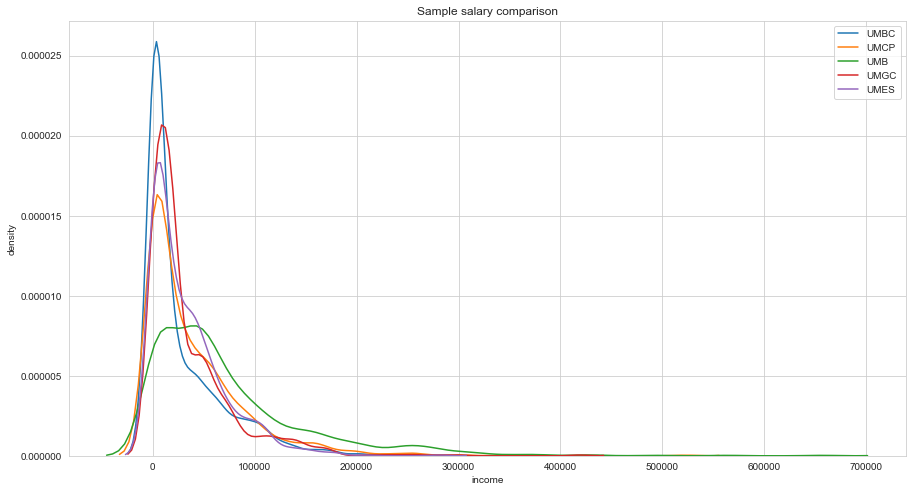

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(UMBC_sample_salary_total['ytd_gross_earnings'], hist = False, label = 'UMBC')
sns.distplot(UMCP_sample_salary_total['ytd_gross_earnings'], hist = False, label = 'UMCP')
sns.distplot(UMB_sample_salary_total['ytd_gross_earnings'], hist = False, label = 'UMB')
sns.distplot(UMGC_sample_salary_total['ytd_gross_earnings'], hist = False,  label = 'UMGC')
sns.distplot(UMES_sample_salary_total['ytd_gross_earnings'], hist = False,  label = 'UMES')

plt.legend()
plt.title('Sample salary comparison')
plt.xlabel('income')
plt.ylabel('density')

In [ ]:
fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_total['ytd_gross_earnings'], UMCP_sample_salary_total['ytd_gross_earnings'], 
                                UMB_sample_salary_total['ytd_gross_earnings'], UMGC_sample_salary_total['ytd_gross_earnings'], 
                                UMES_sample_salary_total['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')

Statistics=113.563631, p=0.000000
Probably different distributions (reject H0)


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

# Tukey HSD test for multiple pairwise comparison (Post-hoc comparison) 
### H0: no statistical significant difference between two universities
### Ha: statistical significant difference between two universities

In [ ]:
all_sample_salary_total=UMBC_sample_salary_total.append(UMCP_sample_salary_total).append(UMB_sample_salary_total).append(UMGC_sample_salary_total).append(UMES_sample_salary_total)

result = pairwise_tukeyhsd(endog=all_sample_salary_total['ytd_gross_earnings'], groups=all_sample_salary_total['School'], alpha=0.05)
print(result)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2 meandiff p-adj     lower       upper    reject
------------------------------------------------------------
   UMB   UMBC -42722.0  0.001 -48961.7598 -36482.2402   True
   UMB   UMCP -31561.0  0.001 -37800.7598 -25321.2402   True
   UMB   UMES -37992.0  0.001 -44231.7598 -31752.2402   True
   UMB   UMGC -37711.0  0.001 -43950.7598 -31471.2402   True
  UMBC   UMCP  11161.0  0.001   4921.2402  17400.7598   True
  UMBC   UMES   4730.0  0.234  -1509.7598  10969.7598  False
  UMBC   UMGC   5011.0 0.1829  -1228.7598  11250.7598  False
  UMCP   UMES  -6431.0 0.0396 -12670.7598   -191.2402   True
  UMCP   UMGC  -6150.0 0.0557 -12389.7598     89.7598  False
  UMES   UMGC    281.0    0.9  -5958.7598   6520.7598  False
------------------------------------------------------------


Above results from Tukey HSD suggests that pairwise comparisons for UMB with all other universities reject null hypothesis and indicates statistical significant differences.

Besides, UMBC vs UMCP, UMCP vs UMES, UMCP vs UMGC are also rejecting the null hypothesis and indicating statistically significant differences.

In [ ]:
income_by_location=universities[['location','income_categories','ytd_gross_earnings']]
income_by_location['location'].value_counts()

Prince Georges County    206483
Baltimore City            65329
Baltimore County          45980
Somerset County           12628
Name: location, dtype: int64

In [ ]:
Prince_Georges_County  = income_by_location[income_by_location['location'].str.contains('Prince Georges County', na=False)]
sample_Prince_Georges_County = Prince_Georges_County.sample(n = 1000, replace = False) 

Baltimore_City = income_by_location[income_by_location['location'].str.contains('Baltimore City', na=False)]
sample_Baltimore_City = Baltimore_City.sample(n = 1000, replace = False) 

Baltimore_County  = income_by_location[income_by_location['location'].str.contains('Baltimore County', na=False)]
sample_Baltimore_County = Baltimore_County.sample(n = 1000, replace = False) 

Somerset_County  = income_by_location[income_by_location['location'].str.contains('Somerset County', na=False)]
sample_Somerset_County = Somerset_County.sample(n = 1000, replace = False) 

sample_income_by_location = sample_Prince_Georges_County.append(sample_Baltimore_City).append(sample_Baltimore_County).append(sample_Somerset_County)
sample_income_by_location

,location,income_categories,ytd_gross_earnings
75298,Prince Georges County,90001-100000,92000.0
95723,Prince Georges County,110001-120000,112000.0
112636,Prince Georges County,70001-80000,71000.0
82777,Prince Georges County,50001-60000,52000.0
113658,Prince Georges County,150000+,260000.0
...,...,...,...
105318,Somerset County,70001-80000,78000.0
39666,Somerset County,0-10000,0.0
53156,Somerset County,70001-80000,80000.0
128209,Somerset County,0-10000,0.0


# Analysis of Variance Test (ANOVA) 
### H0: salaries are all equal among the locations.
### Ha: at least one of the location is different from others.

In [ ]:
fvalue, pvalue = stats.f_oneway(sample_Baltimore_City['ytd_gross_earnings'], sample_Baltimore_County['ytd_gross_earnings'], 
                                sample_Prince_Georges_County['ytd_gross_earnings'], sample_Somerset_County['ytd_gross_earnings'] )
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')

Statistics=136.992388, p=0.000000
Probably different distributions (reject H0)


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

# Tukey HSD test for multiple pairwise comparison (Post-hoc comparison) 
### H0: no statistical significant difference between two locations
### Ha: statistical significant difference between two locations

In [ ]:
result = pairwise_tukeyhsd(endog=sample_income_by_location['ytd_gross_earnings'], groups=sample_income_by_location['location'], alpha=0.05)
print(result)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                group2        meandiff p-adj     lower       upper    reject
------------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -42885.0  0.001 -49013.5229 -36756.4771   True
       Baltimore City Prince Georges County -33762.0  0.001 -39890.5229 -27633.4771   True
       Baltimore City       Somerset County -39581.0  0.001 -45709.5229 -33452.4771   True
     Baltimore County Prince Georges County   9123.0  0.001   2994.4771  15251.5229   True
     Baltimore County       Somerset County   3304.0 0.5075  -2824.5229   9432.5229  False
Prince Georges County       Somerset County  -5819.0   0.07 -11947.5229    309.5229  False
------------------------------------------------------------------------------------------


Above results from Tukey HSD suggests that pairwise comparisons for Baltimore City with all other locations reject null hypothesis and indicates statistical significant differences.

Besides, Baltimore County vs Prince Georges County is also rejecting the null hypothesis and indicating statistically significant differences.

# Analysis of Variance Test (ANOVA) for each year 2012-2019
### H0: salaries are all equal among the universities.
### Ha: at least one of the universities is different from others.

In [ ]:
UMBC_sample_salary_2012 = UMBC[UMBC['year']=="2012"].sample(n = 1000, replace = False) 
UMCP_sample_salary_2012 = UMCP[UMCP['year']=="2012"].sample(n = 1000, replace = False) 
UMB_sample_salary_2012 = UMB[UMB['year']=="2012"].sample(n = 1000, replace = False) 
UMGC_sample_salary_2012 = UMGC[UMGC['year']=="2012"].sample(n = 1000, replace = False) 
UMES_sample_salary_2012 = UMES[UMES['year']=="2012"].sample(n = 1000, replace = False) 

fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_2012['ytd_gross_earnings'], UMCP_sample_salary_2012['ytd_gross_earnings'], 
                                UMB_sample_salary_2012['ytd_gross_earnings'], UMGC_sample_salary_2012['ytd_gross_earnings'], 
                                UMES_sample_salary_2012['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2012=UMBC_sample_salary_2012.append(UMCP_sample_salary_2012).append(UMB_sample_salary_2012).append(UMGC_sample_salary_2012).append(UMES_sample_salary_2012)

result = pairwise_tukeyhsd(endog=all_sample_salary_2012['ytd_gross_earnings'], groups=all_sample_salary_2012['School'], alpha=0.05)
print(result)

Statistics=82.644677, p=0.000000
Probably different distributions (reject H0)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower       upper    reject
-----------------------------------------------------------
   UMB   UMBC -32039.0 0.001 -37909.5913 -26168.4087   True
   UMB   UMCP -22755.0 0.001 -28625.5913 -16884.4087   True
   UMB   UMES -31995.0 0.001 -37865.5913 -26124.4087   True
   UMB   UMGC -11688.0 0.001 -17558.5913  -5817.4087   True
  UMBC   UMCP   9284.0 0.001   3413.4087  15154.5913   True
  UMBC   UMES     44.0   0.9  -5826.5913   5914.5913  False
  UMBC   UMGC  20351.0 0.001  14480.4087  26221.5913   True
  UMCP   UMES  -9240.0 0.001 -15110.5913  -3369.4087   True
  UMCP   UMGC  11067.0 0.001   5196.4087  16937.5913   True
  UMES   UMGC  20307.0 0.001  14436.4087  26177.5913   True
-----------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

In [ ]:
UMBC_sample_salary_2013 = UMBC[UMBC['year']=="2013"].sample(n = 1000, replace = False) 
UMCP_sample_salary_2013 = UMCP[UMCP['year']=="2013"].sample(n = 1000, replace = False) 
UMB_sample_salary_2013 = UMB[UMB['year']=="2013"].sample(n = 1000, replace = False) 
UMGC_sample_salary_2013 = UMGC[UMGC['year']=="2013"].sample(n = 1000, replace = False) 
UMES_sample_salary_2013 = UMES[UMES['year']=="2013"].sample(n = 1000, replace = False) 

fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_2013['ytd_gross_earnings'], UMCP_sample_salary_2013['ytd_gross_earnings'], 
                                UMB_sample_salary_2013['ytd_gross_earnings'], UMGC_sample_salary_2013['ytd_gross_earnings'], 
                                UMES_sample_salary_2013['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2013=UMBC_sample_salary_2013.append(UMCP_sample_salary_2013).append(UMB_sample_salary_2013).append(UMGC_sample_salary_2013).append(UMES_sample_salary_2013)

result = pairwise_tukeyhsd(endog=all_sample_salary_2013['ytd_gross_earnings'], groups=all_sample_salary_2013['School'], alpha=0.05)
print(result)

Statistics=83.758323, p=0.000000
Probably different distributions (reject H0)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2 meandiff p-adj     lower       upper    reject
------------------------------------------------------------
   UMB   UMBC -32695.0  0.001 -38849.5221 -26540.4779   True
   UMB   UMCP -25421.0  0.001 -31575.5221 -19266.4779   True
   UMB   UMES -36446.0  0.001 -42600.5221 -30291.4779   True
   UMB   UMGC -16212.0  0.001 -22366.5221 -10057.4779   True
  UMBC   UMCP   7274.0 0.0111   1119.4779  13428.5221   True
  UMBC   UMES  -3751.0 0.4585  -9905.5221   2403.5221  False
  UMBC   UMGC  16483.0  0.001  10328.4779  22637.5221   True
  UMCP   UMES -11025.0  0.001 -17179.5221  -4870.4779   True
  UMCP   UMGC   9209.0  0.001   3054.4779  15363.5221   True
  UMES   UMGC  20234.0  0.001  14079.4779  26388.5221   True
------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

In [ ]:
UMBC_sample_salary_2014 = UMBC[UMBC['year']=="2014"].sample(n = 1000, replace = False) 
UMCP_sample_salary_2014 = UMCP[UMCP['year']=="2014"].sample(n = 1000, replace = False) 
UMB_sample_salary_2014 = UMB[UMB['year']=="2014"].sample(n = 1000, replace = False) 
UMGC_sample_salary_2014 = UMGC[UMGC['year']=="2014"].sample(n = 1000, replace = False) 
UMES_sample_salary_2014 = UMES[UMES['year']=="2014"].sample(n = 1000, replace = False) 

fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_2014['ytd_gross_earnings'], UMCP_sample_salary_2014['ytd_gross_earnings'], 
                                UMB_sample_salary_2014['ytd_gross_earnings'], UMGC_sample_salary_2014['ytd_gross_earnings'], 
                                UMES_sample_salary_2014['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2014=UMBC_sample_salary_2014.append(UMCP_sample_salary_2014).append(UMB_sample_salary_2014).append(UMGC_sample_salary_2014).append(UMES_sample_salary_2014)

result = pairwise_tukeyhsd(endog=all_sample_salary_2014['ytd_gross_earnings'], groups=all_sample_salary_2014['School'], alpha=0.05)
print(result)

Statistics=90.127960, p=0.000000
Probably different distributions (reject H0)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower       upper    reject
-----------------------------------------------------------
   UMB   UMBC -36690.0 0.001 -42998.0548 -30381.9452   True
   UMB   UMCP -24560.0 0.001 -30868.0548 -18251.9452   True
   UMB   UMES -35421.0 0.001 -41729.0548 -29112.9452   True
   UMB   UMGC -13236.0 0.001 -19544.0548  -6927.9452   True
  UMBC   UMCP  12130.0 0.001   5821.9452  18438.0548   True
  UMBC   UMES   1269.0   0.9  -5039.0548   7577.0548  False
  UMBC   UMGC  23454.0 0.001  17145.9452  29762.0548   True
  UMCP   UMES -10861.0 0.001 -17169.0548  -4552.9452   True
  UMCP   UMGC  11324.0 0.001   5015.9452  17632.0548   True
  UMES   UMGC  22185.0 0.001  15876.9452  28493.0548   True
-----------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

In [ ]:
UMBC_sample_salary_2015 = UMBC[UMBC['year']=="2015"].sample(n = 1000, replace = False) 
UMCP_sample_salary_2015 = UMCP[UMCP['year']=="2015"].sample(n = 1000, replace = False) 
UMB_sample_salary_2015 = UMB[UMB['year']=="2015"].sample(n = 1000, replace = False) 
UMGC_sample_salary_2015 = UMGC[UMGC['year']=="2015"].sample(n = 1000, replace = False) 
UMES_sample_salary_2015 = UMES[UMES['year']=="2015"].sample(n = 1000, replace = False) 

fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_2015['ytd_gross_earnings'], UMCP_sample_salary_2015['ytd_gross_earnings'], 
                                UMB_sample_salary_2015['ytd_gross_earnings'], UMGC_sample_salary_2015['ytd_gross_earnings'], 
                                UMES_sample_salary_2015['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2015=UMBC_sample_salary_2015.append(UMCP_sample_salary_2015).append(UMB_sample_salary_2015).append(UMGC_sample_salary_2015).append(UMES_sample_salary_2015)

result = pairwise_tukeyhsd(endog=all_sample_salary_2015['ytd_gross_earnings'], groups=all_sample_salary_2015['School'], alpha=0.05)
print(result)

Statistics=119.340027, p=0.000000
Probably different distributions (reject H0)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2 meandiff p-adj     lower       upper    reject
------------------------------------------------------------
   UMB   UMBC -40921.0  0.001 -47052.0949 -34789.9051   True
   UMB   UMCP -34856.0  0.001 -40987.0949 -28724.9051   True
   UMB   UMES -37671.0  0.001 -43802.0949 -31539.9051   True
   UMB   UMGC -40298.0  0.001 -46429.0949 -34166.9051   True
  UMBC   UMCP   6065.0 0.0542    -66.0949  12196.0949  False
  UMBC   UMES   3250.0 0.5845  -2881.0949   9381.0949  False
  UMBC   UMGC    623.0    0.9  -5508.0949   6754.0949  False
  UMCP   UMES  -2815.0 0.6943  -8946.0949   3316.0949  False
  UMCP   UMGC  -5442.0 0.1097 -11573.0949    689.0949  False
  UMES   UMGC  -2627.0 0.7418  -8758.0949   3504.0949  False
------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

In [ ]:
UMBC_sample_salary_2016 = UMBC[UMBC['year']=="2016"].sample(n = 1000, replace = False) 
UMCP_sample_salary_2016 = UMCP[UMCP['year']=="2016"].sample(n = 1000, replace = False) 
UMB_sample_salary_2016 = UMB[UMB['year']=="2016"].sample(n = 1000, replace = False) 
UMGC_sample_salary_2016 = UMGC[UMGC['year']=="2016"].sample(n = 1000, replace = False) 
UMES_sample_salary_2016 = UMES[UMES['year']=="2016"].sample(n = 1000, replace = False) 

fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_2016['ytd_gross_earnings'], UMCP_sample_salary_2016['ytd_gross_earnings'], 
                                UMB_sample_salary_2016['ytd_gross_earnings'], UMGC_sample_salary_2016['ytd_gross_earnings'], 
                                UMES_sample_salary_2016['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2016=UMBC_sample_salary_2016.append(UMCP_sample_salary_2016).append(UMB_sample_salary_2016).append(UMGC_sample_salary_2016).append(UMES_sample_salary_2016)

result = pairwise_tukeyhsd(endog=all_sample_salary_2016['ytd_gross_earnings'], groups=all_sample_salary_2016['School'], alpha=0.05)
print(result)

Statistics=115.411045, p=0.000000
Probably different distributions (reject H0)
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
   UMB   UMBC -41843.0  0.001 -48603.465 -35082.535   True
   UMB   UMCP -33039.0  0.001 -39799.465 -26278.535   True
   UMB   UMES -46445.0  0.001 -53205.465 -39684.535   True
   UMB   UMGC -19304.0  0.001 -26064.465 -12543.535   True
  UMBC   UMCP   8804.0 0.0035   2043.535  15564.465   True
  UMBC   UMES  -4602.0 0.3409 -11362.465   2158.465  False
  UMBC   UMGC  22539.0  0.001  15778.535  29299.465   True
  UMCP   UMES -13406.0  0.001 -20166.465  -6645.535   True
  UMCP   UMGC  13735.0  0.001   6974.535  20495.465   True
  UMES   UMGC  27141.0  0.001  20380.535  33901.465   True
----------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

In [ ]:
UMBC_sample_salary_2017 = UMBC[UMBC['year']=="2017"].sample(n = 1000, replace = False) 
UMCP_sample_salary_2017 = UMCP[UMCP['year']=="2017"].sample(n = 1000, replace = False) 
UMB_sample_salary_2017 = UMB[UMB['year']=="2017"].sample(n = 1000, replace = False) 
UMGC_sample_salary_2017 = UMGC[UMGC['year']=="2017"].sample(n = 1000, replace = False) 
UMES_sample_salary_2017 = UMES[UMES['year']=="2017"].sample(n = 1000, replace = False) 

fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_2017['ytd_gross_earnings'], UMCP_sample_salary_2017['ytd_gross_earnings'], 
                                UMB_sample_salary_2017['ytd_gross_earnings'], UMGC_sample_salary_2017['ytd_gross_earnings'], 
                                UMES_sample_salary_2017['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2017=UMBC_sample_salary_2017.append(UMCP_sample_salary_2017).append(UMB_sample_salary_2017).append(UMGC_sample_salary_2017).append(UMES_sample_salary_2017)

result = pairwise_tukeyhsd(endog=all_sample_salary_2017['ytd_gross_earnings'], groups=all_sample_salary_2017['School'], alpha=0.05)
print(result)

Statistics=80.006141, p=0.000000
Probably different distributions (reject H0)
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
   UMB   UMBC -36788.0  0.001 -43584.986 -29991.014   True
   UMB   UMCP -30826.0  0.001 -37622.986 -24029.014   True
   UMB   UMES -36964.0  0.001 -43760.986 -30167.014   True
   UMB   UMGC -17704.0  0.001 -24500.986 -10907.014   True
  UMBC   UMCP   5962.0 0.1174   -834.986  12758.986  False
  UMBC   UMES   -176.0    0.9  -6972.986   6620.986  False
  UMBC   UMGC  19084.0  0.001  12287.014  25880.986   True
  UMCP   UMES  -6138.0  0.099 -12934.986    658.986  False
  UMCP   UMGC  13122.0  0.001   6325.014  19918.986   True
  UMES   UMGC  19260.0  0.001  12463.014  26056.986   True
----------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

In [ ]:
UMBC_sample_salary_2018 = UMBC[UMBC['year']=="2018"].sample(n = 1000, replace = False) 
UMCP_sample_salary_2018 = UMCP[UMCP['year']=="2018"].sample(n = 1000, replace = False) 
UMB_sample_salary_2018 = UMB[UMB['year']=="2018"].sample(n = 1000, replace = False) 
UMGC_sample_salary_2018 = UMGC[UMGC['year']=="2018"].sample(n = 1000, replace = False) 
UMES_sample_salary_2018 = UMES[UMES['year']=="2018"].sample(n = 1000, replace = False) 

fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_2018['ytd_gross_earnings'], UMCP_sample_salary_2018['ytd_gross_earnings'], 
                                UMB_sample_salary_2018['ytd_gross_earnings'], UMGC_sample_salary_2018['ytd_gross_earnings'], 
                                UMES_sample_salary_2018['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2018=UMBC_sample_salary_2018.append(UMCP_sample_salary_2018).append(UMB_sample_salary_2018).append(UMGC_sample_salary_2018).append(UMES_sample_salary_2018)

result = pairwise_tukeyhsd(endog=all_sample_salary_2018['ytd_gross_earnings'], groups=all_sample_salary_2018['School'], alpha=0.05)
print(result)

Statistics=96.994194, p=0.000000
Probably different distributions (reject H0)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2 meandiff p-adj     lower       upper    reject
------------------------------------------------------------
   UMB   UMBC -45078.0  0.001 -52744.5485 -37411.4515   True
   UMB   UMCP -33959.0  0.001 -41625.5485 -26292.4515   True
   UMB   UMES -38534.0  0.001 -46200.5485 -30867.4515   True
   UMB   UMGC -49295.0  0.001 -56961.5485 -41628.4515   True
  UMBC   UMCP  11119.0  0.001   3452.4515  18785.5485   True
  UMBC   UMES   6544.0 0.1356  -1122.5485  14210.5485  False
  UMBC   UMGC  -4217.0 0.5536 -11883.5485   3449.5485  False
  UMCP   UMES  -4575.0 0.4799 -12241.5485   3091.5485  False
  UMCP   UMGC -15336.0  0.001 -23002.5485  -7669.4515   True
  UMES   UMGC -10761.0 0.0012 -18427.5485  -3094.4515   True
------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

In [ ]:
UMBC_sample_salary_2019 = UMBC[UMBC['year']=="2019"].sample(n = 1000, replace = False) 
UMCP_sample_salary_2019 = UMCP[UMCP['year']=="2019"].sample(n = 1000, replace = False) 
UMB_sample_salary_2019 = UMB[UMB['year']=="2019"].sample(n = 1000, replace = False) 
UMGC_sample_salary_2019 = UMGC[UMGC['year']=="2019"].sample(n = 1000, replace = False) 
UMES_sample_salary_2019 = UMES[UMES['year']=="2019"].sample(n = 1000, replace = False) 

fvalue, pvalue = stats.f_oneway(UMBC_sample_salary_2019['ytd_gross_earnings'], UMCP_sample_salary_2019['ytd_gross_earnings'], 
                                UMB_sample_salary_2019['ytd_gross_earnings'], UMGC_sample_salary_2019['ytd_gross_earnings'], 
                                UMES_sample_salary_2019['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2019=UMBC_sample_salary_2019.append(UMCP_sample_salary_2019).append(UMB_sample_salary_2019).append(UMGC_sample_salary_2019).append(UMES_sample_salary_2019)

result = pairwise_tukeyhsd(endog=all_sample_salary_2019['ytd_gross_earnings'], groups=all_sample_salary_2019['School'], alpha=0.05)
print(result)

Statistics=140.974557, p=0.000000
Probably different distributions (reject H0)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2 meandiff p-adj     lower       upper    reject
------------------------------------------------------------
   UMB   UMBC -46958.0  0.001 -53493.1564 -40422.8436   True
   UMB   UMCP -42996.0  0.001 -49531.1564 -36460.8436   True
   UMB   UMES -41396.0  0.001 -47931.1564 -34860.8436   True
   UMB   UMGC -47113.0  0.001 -53648.1564 -40577.8436   True
  UMBC   UMCP   3962.0 0.4639  -2573.1564  10497.1564  False
  UMBC   UMES   5562.0 0.1377   -973.1564  12097.1564  False
  UMBC   UMGC   -155.0    0.9  -6690.1564   6380.1564  False
  UMCP   UMES   1600.0    0.9  -4935.1564   8135.1564  False
  UMCP   UMGC  -4117.0 0.4239 -10652.1564   2418.1564  False
  UMES   UMGC  -5717.0 0.1191 -12252.1564    818.1564  False
------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

# Analysis of Variance Test (ANOVA) for each year 2012-2019
### H0: salaries are all equal among the locations.
### Ha: at least one of the location is different from others.

In [ ]:
Prince_Georges_County  = universities[universities['location'].str.contains('Prince Georges County', na=False)]
Baltimore_City = universities[universities['location'].str.contains('Baltimore City', na=False)]
Baltimore_County  = universities[universities['location'].str.contains('Baltimore County', na=False)]
Somerset_County  = universities[universities['location'].str.contains('Somerset County', na=False)]

In [ ]:
Prince_Georges_County_2012 = Prince_Georges_County[Prince_Georges_County['year']=="2012"].sample(n = 1000, replace = False) 
Baltimore_City_2012 = Baltimore_City[Baltimore_City['year']=="2012"].sample(n = 1000, replace = False) 
Baltimore_County_2012 = Baltimore_County[Baltimore_County['year']=="2012"].sample(n = 1000, replace = False) 
Somerset_County_2012 = Somerset_County[Somerset_County['year']=="2012"].sample(n = 1000, replace = False) 


fvalue, pvalue = stats.f_oneway(Prince_Georges_County_2012['ytd_gross_earnings'], Baltimore_City_2012['ytd_gross_earnings'], 
                                Baltimore_County_2012['ytd_gross_earnings'], Somerset_County_2012['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2012=Prince_Georges_County_2012.append(Baltimore_City_2012).append(Baltimore_County_2012).append(Somerset_County_2012)

result = pairwise_tukeyhsd(endog=all_sample_salary_2012['ytd_gross_earnings'], groups=all_sample_salary_2012['location'], alpha=0.05)
print(result)

Statistics=80.619565, p=0.000000
Probably different distributions (reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                group2        meandiff p-adj    lower       upper    reject
-----------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -30773.0 0.001 -36643.7236 -24902.2764   True
       Baltimore City Prince Georges County -19092.0 0.001 -24962.7236 -13221.2764   True
       Baltimore City       Somerset County -30685.0 0.001 -36555.7236 -24814.2764   True
     Baltimore County Prince Georges County  11681.0 0.001   5810.2764  17551.7236   True
     Baltimore County       Somerset County     88.0   0.9  -5782.7236   5958.7236  False
Prince Georges County       Somerset County -11593.0 0.001 -17463.7236  -5722.2764   True
-----------------------------------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

In [ ]:
Prince_Georges_County_2013 = Prince_Georges_County[Prince_Georges_County['year']=="2013"].sample(n = 1000, replace = False) 
Baltimore_City_2013 = Baltimore_City[Baltimore_City['year']=="2013"].sample(n = 1000, replace = False) 
Baltimore_County_2013 = Baltimore_County[Baltimore_County['year']=="2013"].sample(n = 1000, replace = False) 
Somerset_County_2013 = Somerset_County[Somerset_County['year']=="2013"].sample(n = 1000, replace = False) 


fvalue, pvalue = stats.f_oneway(Prince_Georges_County_2013['ytd_gross_earnings'], Baltimore_City_2013['ytd_gross_earnings'], 
                                Baltimore_County_2013['ytd_gross_earnings'], Somerset_County_2013['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2013=Prince_Georges_County_2013.append(Baltimore_City_2013).append(Baltimore_County_2013).append(Somerset_County_2013)

result = pairwise_tukeyhsd(endog=all_sample_salary_2013['ytd_gross_earnings'], groups=all_sample_salary_2013['location'], alpha=0.05)
print(result)

Statistics=102.370133, p=0.000000
Probably different distributions (reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                group2        meandiff p-adj     lower       upper    reject
------------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -35827.0  0.001 -41981.2122 -29672.7878   True
       Baltimore City Prince Georges County -27120.0  0.001 -33274.2122 -20965.7878   True
       Baltimore City       Somerset County -36567.0  0.001 -42721.2122 -30412.7878   True
     Baltimore County Prince Georges County   8707.0 0.0016   2552.7878  14861.2122   True
     Baltimore County       Somerset County   -740.0    0.9  -6894.2122   5414.2122  False
Prince Georges County       Somerset County  -9447.0  0.001 -15601.2122  -3292.7878   True
------------------------------------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

In [ ]:
Prince_Georges_County_2014 = Prince_Georges_County[Prince_Georges_County['year']=="2014"].sample(n = 1000, replace = False) 
Baltimore_City_2014 = Baltimore_City[Baltimore_City['year']=="2014"].sample(n = 1000, replace = False) 
Baltimore_County_2014 = Baltimore_County[Baltimore_County['year']=="2014"].sample(n = 1000, replace = False) 
Somerset_County_2014 = Somerset_County[Somerset_County['year']=="2014"].sample(n = 1000, replace = False) 


fvalue, pvalue = stats.f_oneway(Prince_Georges_County_2014['ytd_gross_earnings'], Baltimore_City_2014['ytd_gross_earnings'], 
                                Baltimore_County_2014['ytd_gross_earnings'], Somerset_County_2014['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2014=Prince_Georges_County_2014.append(Baltimore_City_2014).append(Baltimore_County_2014).append(Somerset_County_2014)

result = pairwise_tukeyhsd(endog=all_sample_salary_2014['ytd_gross_earnings'], groups=all_sample_salary_2014['location'], alpha=0.05)
print(result)

Statistics=107.900681, p=0.000000
Probably different distributions (reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                group2        meandiff p-adj    lower       upper    reject
-----------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -42323.0 0.001 -49291.4733 -35354.5267   True
       Baltimore City Prince Georges County -30233.0 0.001 -37201.4733 -23264.5267   True
       Baltimore City       Somerset County -42050.0 0.001 -49018.4733 -35081.5267   True
     Baltimore County Prince Georges County  12090.0 0.001   5121.5267  19058.4733   True
     Baltimore County       Somerset County    273.0   0.9  -6695.4733   7241.4733  False
Prince Georges County       Somerset County -11817.0 0.001 -18785.4733  -4848.5267   True
-----------------------------------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

In [ ]:
Prince_Georges_County_2015 = Prince_Georges_County[Prince_Georges_County['year']=="2015"].sample(n = 1000, replace = False) 
Baltimore_City_2015 = Baltimore_City[Baltimore_City['year']=="2015"].sample(n = 1000, replace = False) 
Baltimore_County_2015 = Baltimore_County[Baltimore_County['year']=="2015"].sample(n = 1000, replace = False) 
Somerset_County_2015 = Somerset_County[Somerset_County['year']=="2015"].sample(n = 1000, replace = False) 


fvalue, pvalue = stats.f_oneway(Prince_Georges_County_2015['ytd_gross_earnings'], Baltimore_City_2015['ytd_gross_earnings'], 
                                Baltimore_County_2015['ytd_gross_earnings'], Somerset_County_2015['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2015=Prince_Georges_County_2015.append(Baltimore_City_2015).append(Baltimore_County_2015).append(Somerset_County_2015)

result = pairwise_tukeyhsd(endog=all_sample_salary_2015['ytd_gross_earnings'], groups=all_sample_salary_2015['location'], alpha=0.05)
print(result)

Statistics=139.253504, p=0.000000
Probably different distributions (reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                group2        meandiff p-adj     lower       upper    reject
------------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -41354.0  0.001 -47193.4442 -35514.5558   True
       Baltimore City Prince Georges County -32992.0  0.001 -38831.4442 -27152.5558   True
       Baltimore City       Somerset County -37542.0  0.001 -43381.4442 -31702.5558   True
     Baltimore County Prince Georges County   8362.0 0.0014   2522.5558  14201.4442   True
     Baltimore County       Somerset County   3812.0 0.3358  -2027.4442   9651.4442  False
Prince Georges County       Somerset County  -4550.0 0.1871 -10389.4442   1289.4442  False
------------------------------------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

In [ ]:
Prince_Georges_County_2016 = Prince_Georges_County[Prince_Georges_County['year']=="2016"].sample(n = 1000, replace = False) 
Baltimore_City_2016 = Baltimore_City[Baltimore_City['year']=="2016"].sample(n = 1000, replace = False) 
Baltimore_County_2016 = Baltimore_County[Baltimore_County['year']=="2016"].sample(n = 1000, replace = False) 
Somerset_County_2016 = Somerset_County[Somerset_County['year']=="2016"].sample(n = 1000, replace = False) 


fvalue, pvalue = stats.f_oneway(Prince_Georges_County_2016['ytd_gross_earnings'], Baltimore_City_2016['ytd_gross_earnings'], 
                                Baltimore_County_2016['ytd_gross_earnings'], Somerset_County_2016['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2016=Prince_Georges_County_2016.append(Baltimore_City_2016).append(Baltimore_County_2016).append(Somerset_County_2016)

result = pairwise_tukeyhsd(endog=all_sample_salary_2016['ytd_gross_earnings'], groups=all_sample_salary_2016['location'], alpha=0.05)
print(result)

Statistics=133.893139, p=0.000000
Probably different distributions (reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                group2        meandiff p-adj     lower       upper    reject
------------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -41820.0  0.001 -48212.6824 -35427.3176   True
       Baltimore City Prince Georges County -31958.0  0.001 -38350.6824 -25565.3176   True
       Baltimore City       Somerset County -44145.0  0.001 -50537.6824 -37752.3176   True
     Baltimore County Prince Georges County   9862.0  0.001   3469.3176  16254.6824   True
     Baltimore County       Somerset County  -2325.0 0.7605  -8717.6824   4067.6824  False
Prince Georges County       Somerset County -12187.0  0.001 -18579.6824  -5794.3176   True
------------------------------------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

In [ ]:
Prince_Georges_County_2017 = Prince_Georges_County[Prince_Georges_County['year']=="2017"].sample(n = 1000, replace = False) 
Baltimore_City_2017 = Baltimore_City[Baltimore_City['year']=="2017"].sample(n = 1000, replace = False) 
Baltimore_County_2017 = Baltimore_County[Baltimore_County['year']=="2017"].sample(n = 1000, replace = False) 
Somerset_County_2017 = Somerset_County[Somerset_County['year']=="2017"].sample(n = 1000, replace = False) 


fvalue, pvalue = stats.f_oneway(Prince_Georges_County_2017['ytd_gross_earnings'], Baltimore_City_2017['ytd_gross_earnings'], 
                                Baltimore_County_2017['ytd_gross_earnings'], Somerset_County_2017['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2017=Prince_Georges_County_2017.append(Baltimore_City_2017).append(Baltimore_County_2017).append(Somerset_County_2017)

result = pairwise_tukeyhsd(endog=all_sample_salary_2017['ytd_gross_earnings'], groups=all_sample_salary_2017['location'], alpha=0.05)
print(result)

Statistics=116.512961, p=0.000000
Probably different distributions (reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                group2        meandiff p-adj     lower       upper    reject
------------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -39942.0  0.001 -46473.8234 -33410.1766   True
       Baltimore City Prince Georges County -32323.0  0.001 -38854.8234 -25791.1766   True
       Baltimore City       Somerset County -41579.0  0.001 -48110.8234 -35047.1766   True
     Baltimore County Prince Georges County   7619.0 0.0145   1087.1766  14150.8234   True
     Baltimore County       Somerset County  -1637.0    0.9  -8168.8234   4894.8234  False
Prince Georges County       Somerset County  -9256.0 0.0016 -15787.8234  -2724.1766   True
------------------------------------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

In [ ]:
Prince_Georges_County_2018 = Prince_Georges_County[Prince_Georges_County['year']=="2018"].sample(n = 1000, replace = False) 
Baltimore_City_2018 = Baltimore_City[Baltimore_City['year']=="2018"].sample(n = 1000, replace = False) 
Baltimore_County_2018 = Baltimore_County[Baltimore_County['year']=="2018"].sample(n = 1000, replace = False) 
Somerset_County_2018 = Somerset_County[Somerset_County['year']=="2018"].sample(n = 1000, replace = False) 


fvalue, pvalue = stats.f_oneway(Prince_Georges_County_2018['ytd_gross_earnings'], Baltimore_City_2018['ytd_gross_earnings'], 
                                Baltimore_County_2018['ytd_gross_earnings'], Somerset_County_2018['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2018=Prince_Georges_County_2018.append(Baltimore_City_2018).append(Baltimore_County_2018).append(Somerset_County_2018)

result = pairwise_tukeyhsd(endog=all_sample_salary_2018['ytd_gross_earnings'], groups=all_sample_salary_2018['location'], alpha=0.05)
print(result)

Statistics=43.101512, p=0.000000
Probably different distributions (reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                group2        meandiff p-adj     lower       upper    reject
------------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -43320.0  0.001 -54021.4339 -32618.5661   True
       Baltimore City Prince Georges County -32391.0  0.001 -43092.4339 -21689.5661   True
       Baltimore City       Somerset County -37115.0  0.001 -47816.4339 -26413.5661   True
     Baltimore County Prince Georges County  10929.0 0.0432    227.5661  21630.4339   True
     Baltimore County       Somerset County   6205.0 0.4449  -4496.4339  16906.4339  False
Prince Georges County       Somerset County  -4724.0 0.6484 -15425.4339   5977.4339  False
------------------------------------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

In [ ]:
Prince_Georges_County_2019 = Prince_Georges_County[Prince_Georges_County['year']=="2019"].sample(n = 1000, replace = False) 
Baltimore_City_2019 = Baltimore_City[Baltimore_City['year']=="2019"].sample(n = 1000, replace = False) 
Baltimore_County_2019 = Baltimore_County[Baltimore_County['year']=="2019"].sample(n = 1000, replace = False) 
Somerset_County_2019 = Somerset_County[Somerset_County['year']=="2019"].sample(n = 1000, replace = False) 


fvalue, pvalue = stats.f_oneway(Prince_Georges_County_2019['ytd_gross_earnings'], Baltimore_City_2019['ytd_gross_earnings'], 
                                Baltimore_County_2019['ytd_gross_earnings'], Somerset_County_2019['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')
    
all_sample_salary_2019=Prince_Georges_County_2019.append(Baltimore_City_2019).append(Baltimore_County_2019).append(Somerset_County_2019)

result = pairwise_tukeyhsd(endog=all_sample_salary_2019['ytd_gross_earnings'], groups=all_sample_salary_2019['location'], alpha=0.05)
print(result)

Statistics=142.802236, p=0.000000
Probably different distributions (reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                group2        meandiff p-adj     lower       upper    reject
------------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -44674.0  0.001 -50687.0413 -38660.9587   True
       Baltimore City Prince Georges County -34981.0  0.001 -40994.0413 -28967.9587   True
       Baltimore City       Somerset County -36076.0  0.001 -42089.0413 -30062.9587   True
     Baltimore County Prince Georges County   9693.0  0.001   3679.9587  15706.0413   True
     Baltimore County       Somerset County   8598.0 0.0014   2584.9587  14611.0413   True
Prince Georges County       Somerset County  -1095.0    0.9  -7108.0413   4918.0413  False
------------------------------------------------------------------------------------------


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.